# 2020 US Democrats

In [58]:
from my_weapon import *
plt.style.use('fivethirtyeight')

In [58]:
%ll disk/users-face/

total 475552
-rw-rw-r-- 1 alex    191105 Feb 25 05:32 2020-02-14-2020-02-24-error.lj
-rw-rw-r-- 1 alex  24851275 Feb 25 05:32 2020-02-14-2020-02-24.lj
-rw-rw-r-- 1 alex   8921088 Feb 25 01:04 2020-02-15-error.lj
-rw-rw-r-- 1 alex 210572363 Feb 25 01:00 2020-02-15.lj
-rw-rw-r-- 1 alex 235423638 Feb 25 05:33 2020-02-24.lj
-rw-rw-r-- 1 alex   5854031 Feb 17 15:28 noFace.lj
-rw-rw-r-- 1 alex   1120146 Feb 25 05:32 noFace.txt


## Loading faces

In [5]:
# users = []

# for line in tqdm(open("disk/users-face/2020-02-24.lj")):
#     d = json.loads(line.strip())
#     face = d["faces"][0]
#     # print(face)
#     age = face['attributes']["age"]["value"]
#     gender = face['attributes']["gender"]["value"]

#     if age < 18:
#         continue
#     elif age >= 18 and age < 30:
#         age_range = ">=18, <30"
#     elif age >= 30 and age < 50:
#         age_range = ">=30, <50"
#     elif age >= 50 and age < 65:
#         age_range = ">=50, <65"
#     elif age >= 65:
#         age_range = ">=65"

#     users.append({"uid": d["id"], 
#                   "age": age, 
#                   "gender": gender, 
#                   "age_range": age_range}
#                 )
        
# users = pd.DataFrame(users).set_index("uid")
# users = users[~users.index.duplicated(keep='first')]

users = pd.read_csv("disk/users-face/2020-03-02.csv").set_index("uid")
users

,age,gender,age_range
uid,,,
15715866,30,Male,">=30, <50"
1230079565231468544,47,Female,">=30, <50"
25758126,32,Female,">=30, <50"
2400557966,25,Male,">=18, <30"
2821590472,55,Male,">=50, <65"
...,...,...,...
82088390,23,Male,">=18, <30"
1212289660589764608,34,Female,">=30, <50"
305613459,24,Male,">=18, <30"


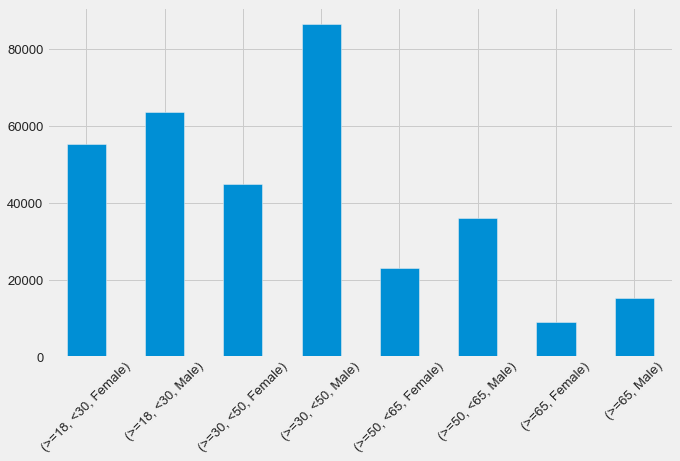

In [116]:
groups = users.groupby(["age_range", "gender"]).size()
groups

sns.set(style="darkgrid", font_scale=1.2)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10, 6))
groups.plot.bar()
plt.xlabel("")
plt.xticks(rotation=45)
plt.savefig("../Argentina_election/web/static/us2020_twitter_population_0302.png",
            bbox_inches = 'tight', dpi=300)

In [59]:
m_18, f_18 = 0, 0
m_30, f_30 = 0, 0
m_50, f_50 = 0, 0
m_65, f_65 = 0, 0

for row in tqdm(users.itertuples()):
    if row.gender == "Male":
        if row.age >= 18 and row.age < 30:
            m_18 += 1
        elif row.age >= 30 and row.age < 50:
            m_30 += 1
        elif row.age >= 50 and row.age < 65:
            m_50 += 1
        elif row.age >= 65:
            m_65 += 1
    elif row.gender == "Female":
        if row.age >= 18 and row.age < 30:
            f_18 += 1
        elif row.age >= 30 and row.age < 50:
            f_30 += 1
        elif row.age >= 50 and row.age < 65:
            f_50 += 1
        elif row.age >= 65:
            f_65 += 1
            
age_gender_dist = {
    "category": [
        "female 18-29", "male 18-29", 
        "female 30-49", "male 30-49", 
        "female 50-64", "male 50-64", 
        "female >=65", "male >=65",
    ],
    "n": [
              f_18, m_18, 
              f_30, m_30, 
              f_50, m_50, 
              f_65, m_65,
         ]
}
age_gender_dist = pd.DataFrame(age_gender_dist).set_index("category")
age_gender_dist["percent"] = age_gender_dist / age_gender_dist.sum()

334123it [00:00, 867124.89it/s]


## Census

In [60]:
data = pd.read_csv("data/US_age_sex.csv")
data

,SUMLEV,REGION,DIVISION,STATE,NAME,SEX,AGE,ESTBASE2010_CIV,POPEST2010_CIV,POPEST2011_CIV,POPEST2012_CIV,POPEST2013_CIV,POPEST2014_CIV,POPEST2015_CIV,POPEST2016_CIV,POPEST2017_CIV,POPEST2018_CIV
0,10,0,0,0,United States,0,0,3944160,3951430,3963092,3926570,3931258,3954786,3983965,3955192,3893945,3848208
1,10,0,0,0,United States,0,1,3978090,3957730,3966225,3977550,3942696,3948892,3973192,4003594,3973803,3912900
2,10,0,0,0,United States,0,2,4096939,4090621,3970654,3978924,3991745,3958708,3966330,3991543,4020825,3991437
3,10,0,0,0,United States,0,3,4119051,4111688,4101644,3981532,3991019,4005932,3974354,3982719,4006802,4036562
4,10,0,0,0,United States,0,4,4063186,4077346,4121488,4111490,3992496,4004035,4020264,3989317,3996592,4021168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,40,4,8,56,Wyoming,2,82,1103,1103,1107,1084,1106,1105,1035,1090,1134,1122
13568,40,4,8,56,Wyoming,2,83,911,936,1028,1035,1002,1030,1031,953,1026,1057
13569,40,4,8,56,Wyoming,2,84,894,883,880,1011,988,945,973,974,919,985
13570,40,4,8,56,Wyoming,2,85,5624,5644,5730,5853,6051,6257,6368,6535,6672,6680


In [61]:
data.NAME.unique()

array(['United States', 'Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [67]:
for state in data.NAME.unique():
    print(state)
    cen = data[data["NAME"]==state]
    cen = {
        "category": ["female 18-29",
                     "male 18-29", 
                     "female 30-49",
                     "male 30-49", 
                     "female 50-64",
                     "male 50-64", 
                     "female >=65", 
                     "male >=65", ],
        "n": [
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 18) & (cen.AGE < 30)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 18) & (cen.AGE < 30)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 30) & (cen.AGE < 50)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 30) & (cen.AGE < 50)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 50) & (cen.AGE < 65)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 50) & (cen.AGE < 65)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 2) & (cen.AGE >= 65) & (cen.AGE < 100)]["POPEST2018_CIV"]),
              sum(cen[(cen.SEX == 1) & (cen.AGE >= 65) & (cen.AGE < 100)]["POPEST2018_CIV"]),
            ]
    }
    cen = pd.DataFrame(cen).set_index("category")
    cen["percent"] = cen / cen.sum()
#     cen
    cen.to_csv(f"data/census/{state}.csv")
    
    plt.figure(figsize=(10, 6))
    cen["percent"].plot.bar()
    plt.xticks(rotation=45)
    plt.xlabel("")
    plt.title(f"Distribution of population from Census ({state})")
    #plt.savefig(f"fig/us_census_{state}.png", dpi=300, bbox_inches = 'tight')
    plt.close()

United States
Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
District of Columbia
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
Tennessee
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [64]:
num2label = {
     0: "Pete Buttigieg", 
     1: "Bernie Sanders", 
     2: "Elizabeth Warren", 
     3: "Joe Biden", 
     4: "Others",
     5: "Mike Bloomberg"
}

def making_pickle_file(csv_file, pickle_file):
    users = pd.read_csv(csv_file).set_index("uid").T.to_dict()
    _users = []
    for u, v in users.items():
        _v = np.array([v["0"], v["1"], v["2"], v["3"], v["4"], v["5"]])
#         _v = np.array([v["0"], v["1"], v["2"], v["3"], v["4"]])
        camp = num2label[_v.argmax()]
        _users.append({
            "uid": u,
            "Camp": camp
        })
    print("# of users:", len(_users))
    pd.DataFrame(_users).set_index("uid").to_pickle(pickle_file)

for i in tqdm(range(1, 181)):
    if i % 3 == 0:
        making_pickle_file(f"disk/users-To2020-02-29/{i}.csv",
                           f"data/users_pickle_mat/To2020-02-29-{i}.pl")

  0%|          | 0/180 [00:00<?, ?it/s]

# of users: 881437


  2%|▏         | 3/180 [00:38<37:30, 12.71s/it]

# of users: 1309213


  3%|▎         | 6/180 [01:33<41:52, 14.44s/it]

# of users: 1654891


  5%|▌         | 9/180 [02:45<49:18, 17.30s/it]

# of users: 1816193


  7%|▋         | 12/180 [04:02<55:33, 19.84s/it]

KeyboardInterrupt: 

In [ ]:
######################################
#################################
#####Matteo
num2label = {
     0: "Pete Buttigieg", 
     1: "Bernie Sanders", 
     2: "Elizabeth Warren", 
     3: "Joe Biden", 
     4: "Others",
     5: "Mike Bloomberg"
}

def making_pickle_file(csv_file, pickle_file):
    users = pd.read_csv(csv_file).set_index("uid").T.to_dict()
    _users = []
    for u, v in users.items():
        _v = np.array([v["0"], v["1"], v["2"], v["3"], v["4"], v["5"]])
#         _v = np.array([v["0"], v["1"], v["2"], v["3"], v["4"]])
        camp = num2label[_v.argmax()]
        _users.append({
            "uid": u,
            "Camp": camp
        })
    print("# of users:", len(_users))
    pd.DataFrame(_users).set_index("uid").to_pickle(pickle_file)

for i in tqdm(range(1, 181)):
    if i % 3 == 0:
        making_pickle_file(f"disk/users-To2020-02-29/{i}.csv",
                           f"data/users_pickle_mat/To2020-02-29-{i}.pl")

In [86]:
# making_pickle_file("disk/users-14days/2020-02-11.csv",
#                    "disk/users-pickle/14days-2020-02-11.pl")

# making_pickle_file("disk/users-14days/2020-02-22.csv",
#                    "disk/users-pickle/14days-2020-02-22.pl")

making_pickle_file("disk/users-14days/2020-02-24.csv",
                   "disk/users-pickle/14days-2020-02-24.pl")

# of users: 1759780


In [125]:
# join the opinions
# users_opinion = pd.read_pickle("disk/users-pickle/14days-2020-02-03.pl")
users_opinion = pd.read_pickle("disk/users-pickle/To2020-02-29-60.pl")
users_opinion

,Camp
uid,
132733246,Elizabeth Warren
929945005891956736,Joe Biden
1143571304404148224,Pete Buttigieg
863813551,Bernie Sanders
347628222,Joe Biden
...,...
2275497224,Bernie Sanders
759905171157704704,Joe Biden
968342215947939841,Pete Buttigieg


In [126]:
print("N of classified users:", len(users_opinion))
print("% of users supporting BS:", float(users_opinion[users_opinion["Camp"] == "Bernie Sanders"].count() / users_opinion.count()) * 100)

N of classified users: 2930096
% of users supporting BS: 42.36444812729685


In [128]:
users_v2 = users.join(users_opinion, how="inner")
print(users_v2)
print("N of classified users with age, gender:", len(users_v2))
print("% of users supporting Clinton:", len(users_v2[users_v2["Camp"] == "Bernie Sanders"]) / len(users_v2) * 100)
print("% of users supporting Others:", len(users_v2[users_v2["Camp"] == "Others"]) / len(users_v2) * 100)

                     age  gender  age_range              Camp
uid                                                          
1230079565231468544   47  Female  >=30, <50         Joe Biden
25758126              32  Female  >=30, <50  Elizabeth Warren
2400557966            25    Male  >=18, <30  Elizabeth Warren
2821590472            55    Male  >=50, <65  Elizabeth Warren
1219837823810801664   23  Female  >=18, <30  Elizabeth Warren
...                  ...     ...        ...               ...
192337760             22  Female  >=18, <30  Elizabeth Warren
573223899             40    Male  >=30, <50    Bernie Sanders
193490876             21  Female  >=18, <30         Joe Biden
30592818              54    Male  >=50, <65    Pete Buttigieg
23071197              31    Male  >=30, <50    Bernie Sanders

[261138 rows x 4 columns]
N of classified users with age, gender: 261138
% of users supporting Clinton: 40.86421738697547
% of users supporting Others: 2.689382625278588


In [123]:
groups = users_v2.groupby(["age_range", "gender", "Camp"]).size()
groups

age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders      18198
                   Elizabeth Warren     7455
                   Joe Biden            3949
                   Others                848
                   Pete Buttigieg      12776
           Male    Bernie Sanders      22327
                   Elizabeth Warren     5741
                   Joe Biden            4422
                   Others               1252
                   Pete Buttigieg      13861
>=30, <50  Female  Bernie Sanders      12288
                   Elizabeth Warren     8490
                   Joe Biden            5477
                   Others               1028
                   Pete Buttigieg       8437
           Male    Bernie Sanders      27732
                   Elizabeth Warren     9575
                   Joe Biden            9586
                   Others               2031
                   Pete Buttigieg      17591
>=50, <65  Female  Bernie Sanders       6519
                   

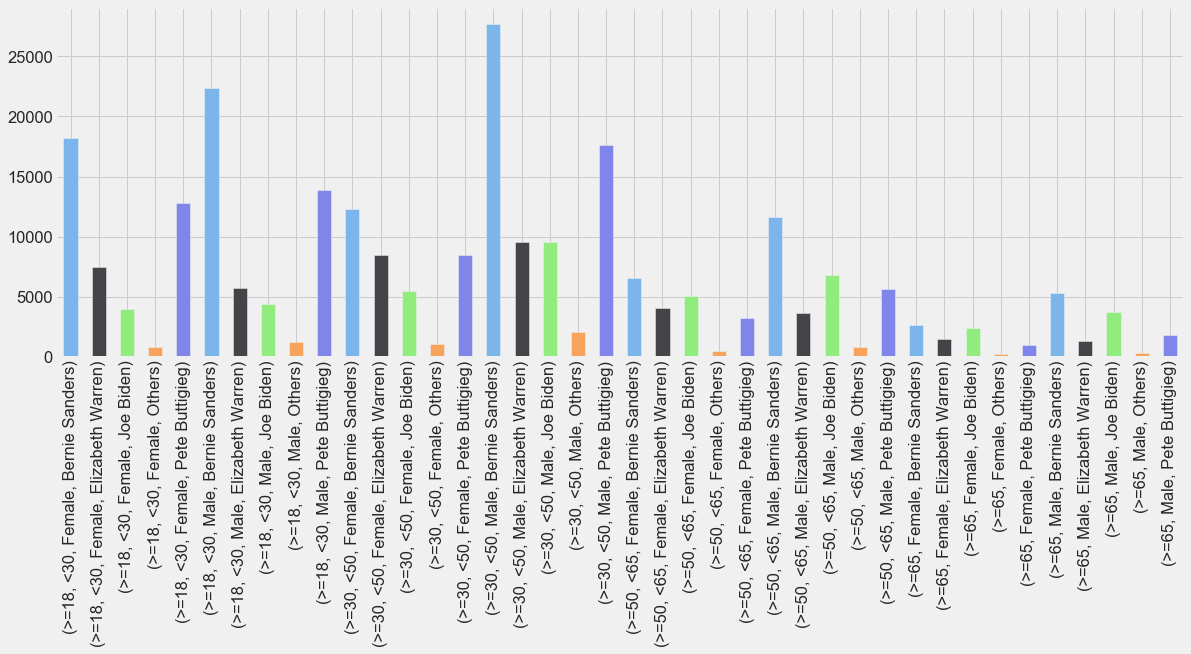

In [129]:
colors = [
'#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9', 
]

sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 6))
groups.plot.bar(color=colors)
plt.xlabel("")
plt.savefig("../Argentina_election/web/static/US2020_age_gender_0302.png", bbox_inches = 'tight', dpi=300)

# Add location (states)

In [59]:
users = pd.read_csv("disk/users-face/2020-03-02.csv").set_index("uid")
users_state = pd.read_csv("disk/users-location/2020-03-02.csv", 
                          usecols=["uid","state"],
                          error_bad_lines=False).set_index("uid")
users_state_gender_age = users.join(users_state, how="inner")
set_users = set(users_state_gender_age.index)

In [110]:
users_v3 = users_v2.join(users_state, how="inner")
users_v3

,age,gender,age_range,Camp,state
uid,,,,,
1230079565231468544,47,Female,">=30, <50",Joe Biden,NC
2821590472,55,Male,">=50, <65",Mike Bloomberg,NY
4872173855,30,Female,">=30, <50",Elizabeth Warren,VA
1230931877420097536,65,Female,>=65,Elizabeth Warren,AZ
1118644273,23,Male,">=18, <30",Elizabeth Warren,CO
...,...,...,...,...,...
15783028,29,Female,">=18, <30",Joe Biden,FL
335333983,66,Female,>=65,Joe Biden,NY
778365522,57,Female,">=50, <65",Elizabeth Warren,NY


In [30]:
states = ['CA', 'TX', 'NY', 'FL', 'IL', 'GA', 'PA', 'OH', 'DC', 'NC', 'MI', 'MA',
       'IN', 'NJ', 'VA', 'AZ', 'TN', 'WA', 'MD', 'CO', 'MO', 'KY', 'LA', 'MN',
       'OR', 'AL', 'SC', 'NV', 'OK', 'WI', 'IA', 'CT', 'KS', 'AR', 'UT', 'MS',
       'WV', 'NE', 'NM', 'HI', 'NH', 'RI', 'ME', 'ID', 'AK', 'DE', 'MT', 'SD',
       'ND', 'VT', 'WY']

In [ ]:
users_v3.Camp.value_counts()

In [35]:
users_tmp = users_v3[users_v3.state=="NV"]

In [36]:
users_tmp.Camp.value_counts()

Bernie Sanders      323
Elizabeth Warren    172
Mike Bloomberg      152
Pete Buttigieg      128
Joe Biden           125
Others               47
Name: Camp, dtype: int64

In [37]:
groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
groups

age_range  gender  Camp            
>=18, <30  Female  Bernie Sanders      29
                   Elizabeth Warren    27
                   Joe Biden            8
                   Mike Bloomberg      17
                   Others               8
                   Pete Buttigieg      26
           Male    Bernie Sanders      52
                   Elizabeth Warren    24
                   Joe Biden            9
                   Mike Bloomberg      11
                   Others               5
                   Pete Buttigieg      15
>=30, <50  Female  Bernie Sanders      36
                   Elizabeth Warren    25
                   Joe Biden           18
                   Mike Bloomberg      26
                   Others               8
                   Pete Buttigieg      23
           Male    Bernie Sanders      98
                   Elizabeth Warren    40
                   Joe Biden           33
                   Mike Bloomberg      40
                   Others              1

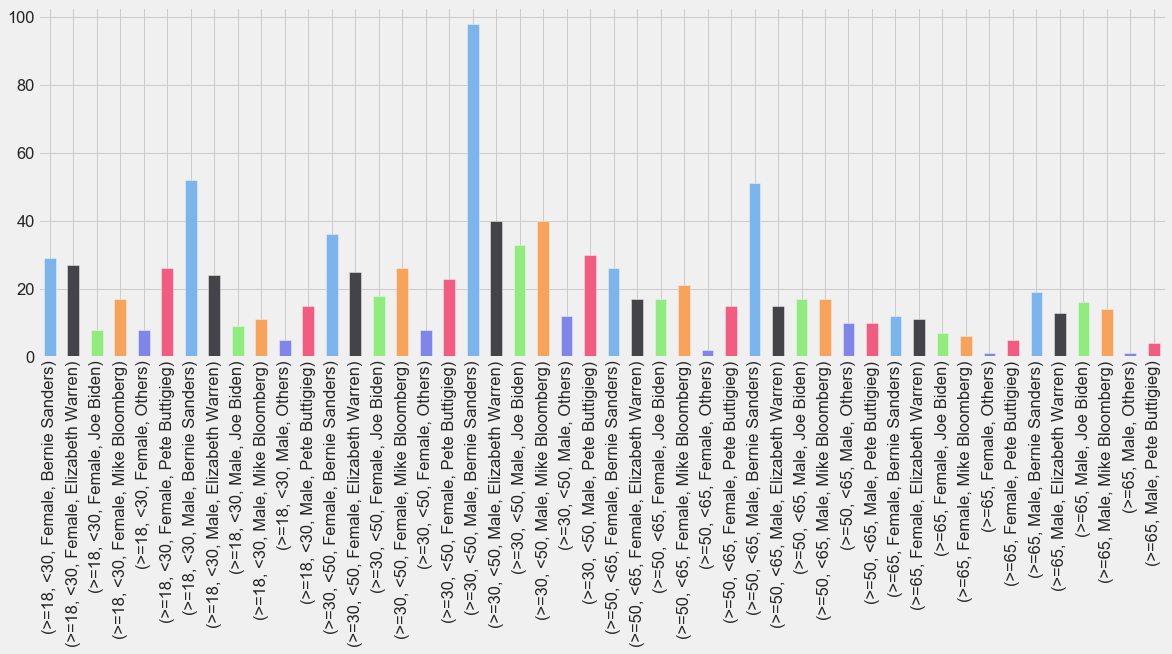

In [38]:
colors = [
'#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9', '#f15c80', 
]
sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(18, 6))
groups.plot.bar(color=colors)
plt.xlabel("")
plt.savefig("../Argentina_election/web/static/US2020_age_gender_NV_0222.png", bbox_inches = 'tight', dpi=300)

In [135]:
sns.set(style="darkgrid", font_scale=1.5)
plt.style.use('fivethirtyeight')

for _state in states:
    # print(_state)
    users_tmp = users_v3[users_v3.state==_state]
    colors = [
        '#7cb5ec', '#434348', '#90ed7d', '#f7a35c', '#8085e9', '#f15c80', 
    ]
    groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
    plt.figure(figsize=(18, 6))
    groups.plot.bar(color=colors)
    plt.xlabel("")
    plt.savefig(f"../Argentina_election/web/static/US2020_age_gender_{_state}_0222.png", 
                bbox_inches = 'tight')
    plt.close()

In [9]:
num2label = {
    # 0: "Pete Buttigieg", #remove pete
     1: "Bernie Sanders", 
     2: "Elizabeth Warren", 
     3: "Joe Biden",
     4: "Others",
     5: "Mike Bloomberg"
}

def making_json_file_v2(csv_file, json_file):
    users = pd.read_csv(csv_file).set_index("uid")
    _users = []
    for u, row in users.iterrows():
        if u in set_users:
            _v = np.array(row)
            max_i = _v.argmax()
            if max_i == 0: # remove pete
                _v[0] = -1
                max_i = _v.argmax()

            camp = num2label[max_i]
            _users.append({
                "uid": u,
                "Camp": camp
            })
    print("# of users:", len(_users))
    users = pd.DataFrame(_users).set_index("uid").join(users_state_gender_age, how="inner")
    users.to_json(json_file)

In [10]:
for i in range(160, 121, -5):
    print(i)
    making_json_file_v2(f"data/Cumulatives_BT/170/{i}.csv",
                        f"data/users-pickle/To2020-02-29-{i}.json")

160
# of users: 150508
155
# of users: 149767
150
# of users: 149057
145
# of users: 148585
140
# of users: 148143
135
# of users: 147526
130
# of users: 147014
125
# of users: 146817


In [95]:
import us
dict_names = us.states.mapping('abbr', 'name')

def rescale_opinion(input_users, state_name):
    if state_name == "US":
        cen = pd.read_csv(f"data/census/US.csv").set_index("category")
    else:
        cen = pd.read_csv(f"data/census/{dict_names[state_name]}.csv").set_index("category")
    # print("After reweighting!")
    w = cen.percent.to_list()
    
    camps = [
         "Bernie Sanders", 
         "Joe Biden",
         "Elizabeth Warren", 
         "Mike Bloomberg",
         "Pete Buttigieg",
         "Others",
    ]
    # print(input_users)
    
    if state_name == "US":
        users_tmp = input_users
    else:
        users_tmp = input_users[input_users.state==state_name]
        
    groups = users_tmp.groupby(["age_range", "gender", "Camp"]).size()
    # print(groups)
    _rst = {}

    for _camp in camps:
        r = groups[">=18, <30"]["Female"].get(_camp, 0) / sum(groups[">=18, <30"]["Female"]) * w[0] \
        + groups[">=18, <30"]["Male"].get(_camp, 0) / sum(groups[">=18, <30"]["Male"]) * w[1] \
        + groups[">=30, <50"]["Female"].get(_camp, 0) / sum(groups[">=30, <50"]["Female"]) * w[2] \
        + groups[">=30, <50"]["Male"].get(_camp, 0) / sum(groups[">=30, <50"]["Male"]) * w[3] \
        + groups[">=50, <65"]["Female"].get(_camp, 0) / sum(groups[">=50, <65"]["Female"]) * w[4] \
        + groups[">=50, <65"]["Male"].get(_camp, 0) / sum(groups[">=50, <65"]["Male"]) * w[5] \
        + groups[">=65"]["Female"].get(_camp, 0) / sum(groups[">=65"]["Female"]) * w[6] \
        + groups[">=65"]["Male"].get(_camp, 0) / sum(groups[">=65"]["Male"]) * w[7]
        # print(_camp, round(r, 3))
        _rst[_camp] = round(r * 100, 1)
        
    return _rst

In [99]:
import ujson as json

SuperTuesday = ["AL", "AR", "CA", "CO",
                "ME", "MA", "MN", "NC", "OK",
                "TN", "TX", "UT", "VT", "VA"]

# SuperTuesday = ["AL", "CA", "CO", "ME", "TX", "UT", "VT", "VA"] # 170
rsts = []
# dt = pendulum.date(2020, 2, 29)
start = pendulum.datetime(2019, 9, 10, tz="UTC")
end = pendulum.datetime(2020, 3, 2, tz="UTC")

for dt in tqdm(pendulum.period(start, end)):
    dt_str = dt.to_date_string()
    print(dt_str)
    if dt_str == "2020-03-02":
        # print(dt_str)
        input_users = pd.read_csv(f"disk/users-culFrom09/{dt_str}.csv").set_index("uid")
        # print(input_users)
        
        for k, v in dict_names.items():
            if k in SuperTuesday:
                # print(k)
                rst = rescale_opinion(input_users, k)
                rst["state"] = k
                rst["dt"] = dt_str
                print(rst)
                rsts.append(rst)
                
rsts = pd.DataFrame(rsts).set_index("dt")
rsts = rsts.sort_index()
rsts.to_csv("data/csv/For_superTuesday_170_v2.csv")


0it [00:00, ?it/s]

2019-09-10
2019-09-11
2019-09-12
2019-09-13
2019-09-14
2019-09-15
2019-09-16
2019-09-17
2019-09-18
2019-09-19
2019-09-20
2019-09-21
2019-09-22
2019-09-23
2019-09-24
2019-09-25
2019-09-26
2019-09-27
2019-09-28
2019-09-29
2019-09-30
2019-10-01
2019-10-02
2019-10-03
2019-10-04
2019-10-05
2019-10-06
2019-10-07
2019-10-08
2019-10-09
2019-10-10
2019-10-11
2019-10-12
2019-10-13
2019-10-14
2019-10-15
2019-10-16
2019-10-17
2019-10-18
2019-10-19
2019-10-20
2019-10-21
2019-10-22
2019-10-23
2019-10-24
2019-10-25
2019-10-26
2019-10-27
2019-10-28
2019-10-29
2019-10-30
2019-10-31
2019-11-01
2019-11-02
2019-11-03
2019-11-04
2019-11-05
2019-11-06
2019-11-07
2019-11-08
2019-11-09
2019-11-10
2019-11-11
2019-11-12
2019-11-13
2019-11-14
2019-11-15
2019-11-16
2019-11-17
2019-11-18
2019-11-19
2019-11-20
2019-11-21
2019-11-22
2019-11-23
2019-11-24
2019-11-25
2019-11-26
2019-11-27
2019-11-28
2019-11-29
2019-11-30
2019-12-01
2019-12-02
2019-12-03
2019-12-04
2019-12-05
2019-12-06
2019-12-07
2019-12-08
2019-12-09


175it [00:07, 23.60it/s]

{'Bernie Sanders': 48.9, 'Joe Biden': 15.0, 'Elizabeth Warren': 20.0, 'Mike Bloomberg': 5.6, 'Pete Buttigieg': 9.2, 'Others': 1.2, 'state': 'VT', 'dt': '2020-03-02'}
{'Bernie Sanders': 27.1, 'Joe Biden': 29.6, 'Elizabeth Warren': 19.2, 'Mike Bloomberg': 8.0, 'Pete Buttigieg': 11.7, 'Others': 4.4, 'state': 'VA', 'dt': '2020-03-02'}


In [76]:
import ujson as json

rsts = []
# dt = pendulum.date(2020, 2, 29)

start = pendulum.datetime(2019, 9, 14, tz="UTC")
end = pendulum.datetime(2020, 3, 2, tz="UTC")
SuperTuesday = ["AL", "CA", "CO", "ME", "MA", "MN", "NC", "TX", "UT", "VT", "VA"] # 170
for dt in tqdm(pendulum.period(start, end)):
    dt_str = dt.to_date_string()
    try:
        input_users = pd.read_csv(f"disk/users-culFrom0912/{dt_str}.csv").set_index("uid")
    except:
        continue
    # print(input_users)
    for k, v in dict_names.items():
        if k in SuperTuesday:
            rst = rescale_opinion(input_users, k)
            rst["state"] = k
            rst["dt"] = dt_str
            # print(rst)
            rsts.append(rst)

start = pendulum.datetime(2019, 9, 19, tz="UTC")
SuperTuesday = ["AR"] # 165
for dt in pendulum.period(start, end):
    dt_str = dt.to_date_string()
    try:
        input_users = pd.read_csv(f"disk/users-culFrom0917/{dt_str}.csv").set_index("uid")
    except:
        continue
    # print(input_users)
    for k, v in dict_names.items():
        if k in SuperTuesday:
            rst = rescale_opinion(input_users, k)
            rst["state"] = k
            rst["dt"] = dt_str
            # print(rst)
            rsts.append(rst)
            
start = pendulum.datetime(2019, 9, 24, tz="UTC")
SuperTuesday = ["OK", "TN"] # 165
for dt in pendulum.period(start, end):
    dt_str = dt.to_date_string()
    try:
        input_users = pd.read_csv(f"disk/users-culFrom0922/{dt_str}.csv").set_index("uid")
    except:
        continue
    # print(input_users)
    for k, v in dict_names.items():
        if k in SuperTuesday:
            rst = rescale_opinion(input_users, k)
            rst["state"] = k
            rst["dt"] = dt_str
            # print(rst)
            rsts.append(rst)
            
rsts = pd.DataFrame(rsts).set_index("dt")
rsts = rsts.sort_index()
rsts.to_csv("data/csv/For_superTuesday_v2.csv")

171it [00:27,  6.13it/s]


In [77]:
data = pd.read_csv("data/csv/For_superTuesday_v2.csv").set_index("dt")
print(data)

            Bernie Sanders  Joe Biden  Elizabeth Warren  Mike Bloomberg  \
dt                                                                        
2019-09-14            34.2       34.1              28.1             0.0   
2019-09-14            34.9       31.6              31.2             0.0   
2019-09-14            37.6       31.2              28.7             0.0   
2019-09-14            40.1       29.2              28.8             0.0   
2019-09-14            29.1       23.9              44.8             0.0   
...                    ...        ...               ...             ...   
2020-03-02            35.5       31.2              20.3             8.4   
2020-03-02            39.1       32.2              15.6             9.4   
2020-03-02            41.2       24.3              18.2            12.1   
2020-03-02            35.9       31.5              19.6             8.4   
2020-03-02            35.3       34.6              16.6             9.3   

            Others state

In [78]:
SuperTuesday = ["AL", "AR", "CA", "CO",
                "ME", "MA", "MN", "NC", "OK",
                "TN", "TX", "UT", "VT", "VA"]

for k, v in dict_names.items():
    if k in SuperTuesday:
        d = data[data.state==k]
        d = d.drop(columns = ['state'])
        d.to_csv(f"data/csv/web/results-percent-{k}.csv")
        print(d)

            Bernie Sanders  Joe Biden  Elizabeth Warren  Mike Bloomberg  \
dt                                                                        
2019-09-14            34.2       34.1              28.1             0.0   
2019-09-16            40.6       35.4              22.5             0.0   
2019-09-21            36.2       38.1              24.2             0.0   
2019-09-23            29.1       48.7              20.5             0.0   
2019-09-28            25.7       57.5              15.3             0.0   
2019-09-30            24.8       58.9              14.7             0.0   
2019-10-05            23.4       61.0              14.3             0.0   
2019-10-07            22.2       62.6              13.9             0.0   
2019-10-12            21.0       63.7              14.4             0.0   
2019-10-14            20.7       63.6              14.6             0.0   
2019-10-19            19.9       63.1              15.7             0.0   
2019-10-21            20.

In [85]:
import ujson as json

rsts = []
# dt = pendulum.date(2020, 2, 29)

start = pendulum.datetime(2019, 9, 14, tz="UTC")
end = pendulum.datetime(2020, 3, 2, tz="UTC")
for dt in tqdm(pendulum.period(start, end)):
    dt_str = dt.to_date_string()
    try:
        input_users = pd.read_csv(f"disk/users-culFrom0912/{dt_str}.csv").set_index("uid")
    except:
        continue
        
    rst = rescale_opinion(input_users, "US")
    rst["dt"] = dt_str
    # print(rst)
    rsts.append(rst)
            
rsts = pd.DataFrame(rsts).set_index("dt")
rsts = rsts.sort_index()
rsts.to_csv("data/csv/For_superTuesday_us.csv")

171it [00:04, 40.59it/s]


In [42]:
import us
dict_names = us.states.mapping('abbr', 'name')
dict_names

{'AL': 'Alabama',
 'AK': 'Alaska',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'AR': 'Arkansas',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DK': 'Dakota',
 'DE': 'Delaware',
 'DC': 'District of Columbia',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'IA': 'Iowa',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'ME': 'Maine',
 'MD': 'Maryland',
 'MA': 'Massachusetts',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MS': 'Mississippi',
 'MO': 'Missouri',
 'MT': 'Montana',
 'NE': 'Nebraska',
 'NV': 'Nevada',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NY': 'New York',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'MP': 'Northern Mariana Islands',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'OL': 'Orleans',
 'PA': 'Pennsylvania',
 'PI': 'Philippine Islands',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 

## !! Old codes: Added location (counties)

In [46]:
users_county = pd.read_csv("data/us-user-county.csv").set_index("uid")

In [47]:
users_v3 = users_opinion.join(users_county, on='uid')

In [48]:
users_v3 = users_v3.dropna()

In [37]:
county_users = {}
for row in tqdm(users_v3.itertuples()):
    if row.loc not in county_users:
        county_users[row.loc] = [0, 0]
    if row.Camp=="Clinton":
        county_users[row.loc][0] += 1
    elif row.Camp=="Trump":
        county_users[row.loc][1] += 1

In [38]:
county_users_gap = {}

for loc, v in county_users.items():
    # print(v[0] + v[1])
    if v[0] + v[1] > 0:
        county_users_gap[loc] = round(v[0] / (v[0] + v[1]) - v[1] / (v[0] + v[1]), 3)

In [25]:
county_users_gap = sorted(county_users_gap.items(), key=lambda d:d[1], reverse=True)

In [28]:
for loc, v in county_users_gap:
    print(loc, v, sep="\t", file=open("data/us-county-users-gap.txt", "w"))

In [39]:
original_data = json.load(open("data/us-counties-unemployment.json"))
for d in original_data:
    d['value'] = 0
    d["name"] = d["name"].replace(" County", "").replace(" Municipio", "")

In [40]:
# match
for d in original_data:
    if d['name'] in county_users_gap:
        d['value'] = county_users_gap[d["name"]]

In [44]:
final_data = []

for v in original_data:
    if v['value'] != 0:
        final_data.append(v)

In [45]:
json.dump(final_data, open("web/data/us-county-opinion.json", "w"), indent=2)